
# Plotting with Geoplot and GeoPandas

[Geoplot](https://residentmario.github.io/geoplot/index.html) is a Python
library providing a selection of easy-to-use geospatial visualizations. It is
built on top of the lower-level [CartoPy](http://scitools.org.uk/cartopy/),
covered in a separate section of this tutorial, and is designed to work with
GeoPandas input.

This example is a brief tour of the `geoplot` API. For more details on the
library refer to [its documentation](https://residentmario.github.io/geoplot/index.html).

First we'll load in the data using GeoPandas.


In [2]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

Plotting with Geoplot
=====================

We start out by replicating the basic GeoPandas world plot using Geoplot.



<AxesSubplot:>

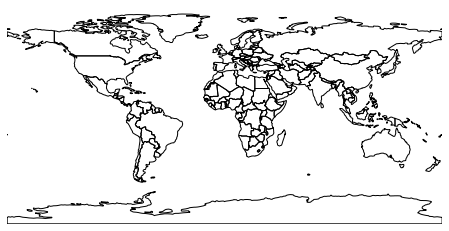

In [3]:
geoplot.polyplot(world, figsize=(8, 4))

Geoplot can re-project data into any of the map projections provided by
CartoPy (see the list
[here](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html)).



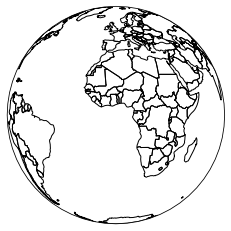

In [4]:
# use the Orthographic map projection (e.g. a world globe)
ax = geoplot.polyplot(
    world, projection=geoplot.crs.Orthographic(), figsize=(8, 4)
)
ax.outline_patch.set_visible(True)

``polyplot`` is trivial and can only plot the geometries you pass to it. If
you want to use color as a visual variable, specify a ``choropleth``. Here
we sort GDP per person by country into five buckets by color, using
"quantiles" binning from the [Mapclassify](https://pysal.org/mapclassify/)
library.



<AxesSubplot:>

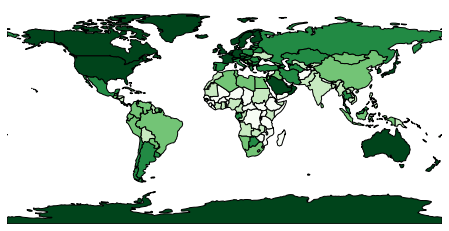

In [5]:
import mapclassify
gpd_per_person = world['gdp_md_est'] / world['pop_est']
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=gpd_per_person, scheme=scheme,
    cmap='Greens', figsize=(8, 4)
)

If you want to use size as a visual variable, use a ``cartogram``. Here are
population estimates for countries in Africa.



<AxesSubplot:>

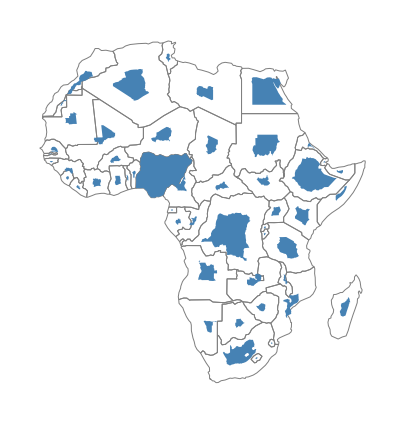

In [6]:
africa = world.query('continent == "Africa"')
ax = geoplot.cartogram(
    africa, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)
geoplot.polyplot(africa, edgecolor='gray', ax=ax)

If we have data in the shape of points in space, we may generate a
three-dimensional heatmap on it using ``kdeplot``.



<GeoAxesSubplot:>

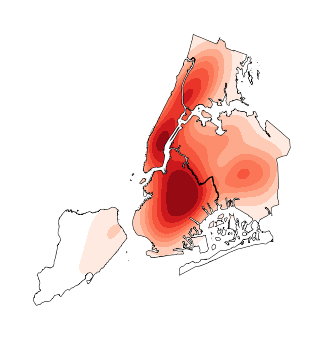

In [7]:
ax = geoplot.kdeplot(
    collisions.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

Alternatively, we may partition the space into neighborhoods automatically,
using Voronoi tessellation. This is a good way of visually verifying whether
or not a certain data column is spatially correlated.



In [ ]:
ax = geoplot.voronoi(
    collisions.head(1000), projection=geoplot.crs.AlbersEqualArea(),
    clip=boroughs.simplify(0.001),
    hue='NUMBER OF PERSONS INJURED', cmap='Reds',
    legend=True,
    edgecolor='white'
)
geoplot.polyplot(boroughs, edgecolor='black', zorder=1, ax=ax)

These are just some of the plots you can make with Geoplot. There are
many other possibilities not covered in this brief introduction. For more
examples, refer to the
[Gallery](https://residentmario.github.io/geoplot/gallery/index.html) in
the Geoplot documentation.

